In [1]:
#Random Forest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('loandataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df['Gender']=df['Gender'].map({'Male':1,'Female':0})
df['Married']=df['Married'].map({'Yes':1,'No':0})
df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
df['Dependents'].replace('3+',3,inplace=True)
df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})
df['Property_Area']=df['Property_Area'].map({'Semiurban':1,'Urban':2,'Rural':3})
df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

In [5]:
rev_null=['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']
df[rev_null]=df[rev_null].replace({np.nan:df['Gender'].mode(),
                                   np.nan:df['Married'].mode(),
                                   np.nan:df['Dependents'].mode(),
                                   np.nan:df['Self_Employed'].mode(),
                                   np.nan:df['Credit_History'].mode(),
                                   np.nan:df['LoanAmount'].mean(),
                                   np.nan:df['Loan_Amount_Term'].mean()})

In [6]:
X=df.drop(columns=['Loan_ID','Loan_Status']).values
Y=df['Loan_Status'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (491, 11)
Shape of X_test=> (123, 11)
Shape of Y_train=> (491,)
Shape of Y_test=> (123,)


In [7]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 45)
rfc.fit(X_train, Y_train)

rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train))

rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test))

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.857142857142857


In [8]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'gini', random_state = 45, n_estimators=100)
rfc.fit(X_train, Y_train)

rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train))

rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test))

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.8444444444444444


In [9]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'gini', random_state = 45, n_estimators=30)
rfc.fit(X_train, Y_train)

rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation F1-Score=>',f1_score(Y_train,rfc_pred_train))

rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(Y_test,rfc_pred_test))

Training Set Evaluation F1-Score=> 1.0
Testing Set Evaluation F1-Score=> 0.8603351955307262


In [10]:
#any clustering algorithm

In [11]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('apples_and_oranges.csv')
data.head()

,Weight,Size,Class
0,69,4.39,orange
1,69,4.21,orange
2,65,4.09,orange
3,72,5.85,apple
4,67,4.70,orange


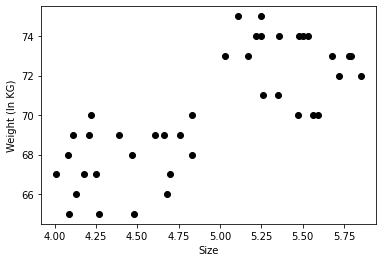

In [13]:
X = data[["Weight","Size"]]
plt.scatter(X["Size"],X["Weight"],c='black')
plt.xlabel('Size')
plt.ylabel('Weight (In KG)')
plt.show()

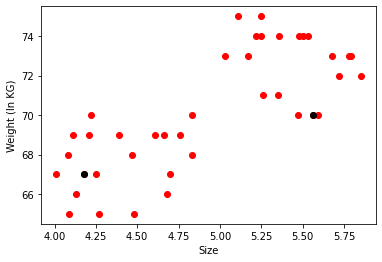

In [14]:
K=2
Centroids = (X.sample(n=K))
plt.scatter(X["Size"],X["Weight"],c='red')
plt.scatter(Centroids["Size"],Centroids["Weight"],c='black')
plt.xlabel('Size')
plt.ylabel('Weight (In KG)')
plt.show()

In [15]:
j=0
x = 1
while(x!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Size"]-row_d["Size"])**2
            d2=(row_c["Weight"]-row_d["Weight"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Weight","Size"]]
    if j == 0:
        x=1
        j=j+1
    else:
        x = (Centroids_new['Weight'] - Centroids['Weight']).sum() + (Centroids_new['Size'] - Centroids['Size']).sum()
        print(x.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Weight","Size"]]

1.786295093795097
0.3023076630971433
0.3067781954887243
0.9244488491048557
0.0


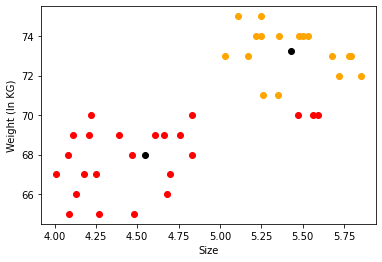

In [16]:
color=['orange','red']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Size"],data["Weight"],c=color[k])
plt.scatter(Centroids["Size"],Centroids["Weight"],c='black')
plt.xlabel('Size')
plt.ylabel('Weight (In KG)')
plt.show()